# Income Distribution in Thailand

### Package Import

In [380]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.patheffects as pe
from sklearn.linear_model import LinearRegression
pd.options.display.float_format = '{:,.2f}'.format

In [203]:
# Visualization Default Settings

params = {"axes.spines.right": False,
          "axes.spines.top": False, 
          "axes.spines.left": False,
          "axes.spines.bottom": False,
          "font.family": "Arial",
          "axes.labelsize": 12,
          "xtick.labelsize": 12,
          "ytick.labelsize": 12
         }




# params = {"figure.facecolor": "#cad9e1",
#               "axes.facecolor": "#cad9e1",
#               "axes.grid" : True,
#               "axes.grid.axis" : "y",
#               "grid.color"    : "#ffffff",
#               "grid.linewidth": 2,
#               "axes.spines.left" : False,
#               "axes.spines.right" : False,
#               "axes.spines.top" : False,
#               "ytick.major.size": 0,     
#               "ytick.minor.size": 0,
#               "xtick.direction" : "in",
#               "xtick.major.size" : 7,
#               "xtick.color"      : "#191919",
#               "axes.edgecolor"    :"#191919",
#               "axes.prop_cycle" : plt.cycler('color',
#                                     ['#006767', '#ff7f0e', '#2ca02c', '#d62728',
#                                      '#9467bd', '#8c564b', '#e377c2', '#7f7f7f',
#                                      '#bcbd22', '#17becf'])}


plt.rcParams.update(params)

### Data Import

In [45]:
raw_data = pd.read_csv('data/TH_TaxIncomeBrackets.csv')
raw_data = raw_data.apply(pd.to_numeric, downcast='float')
raw_data = raw_data.rename(columns={'Tax_Units':'N'})
raw_data['TotIncome'] = raw_data['Tot_Income_mil'] * 1000000
raw_data['AvgIncome'] = raw_data['TotIncome'] / raw_data['N']
raw_data = raw_data.sort_values('Income_LB')
raw_data

,Income_LB,Income_UB,N,Tot_Income_mil,TotIncome,AvgIncome
0,0.00,"100,000.00","1,369,075.00","70,420.00","70,420,000,000.00","51,436.19"
1,"100,000.00","150,000.00","1,163,511.00","146,347.00","146,347,000,000.00","125,780.50"
2,"150,000.00","200,000.00","1,319,399.00","231,703.00","231,703,000,000.00","175,612.53"
3,"200,000.00","300,000.00","2,063,376.00","513,683.00","513,683,000,000.00","248,952.69"
4,"300,000.00","400,000.00","1,447,149.00","505,048.00","505,048,000,000.00","348,995.16"
5,"400,000.00","500,000.00","964,896.00","431,275.00","431,275,000,000.00","446,965.27"
6,"500,000.00","750,000.00","1,355,676.00","822,411.00","822,411,000,000.00","606,642.74"
7,"750,000.00","1,000,000.00","587,572.00","502,278.00","502,278,000,000.00","854,836.51"
8,"1,000,000.00","1,500,000.00","438,883.00","529,437.00","529,437,000,000.00","1,206,328.34"
9,"1,500,000.00","2,000,000.00","175,204.00","299,431.00","299,431,000,000.00","1,709,042.03"


### Income Distribution

* Add CDF for both TaxUnits and TotIncome

In [49]:
cum_data = raw_data[['N', 'TotIncome']].cumsum()
cum_data['Income_LB'] = raw_data['Income_LB']
cum_data['CumN'] = cum_data['N'] / np.sum(raw_data['N'])
cum_data['CumIncome'] = cum_data['TotIncome'] / np.sum(raw_data['TotIncome'])
cum_data = cum_data[['Income_LB','CumN','CumIncome']]
cum_data

,Income_LB,CumN,CumIncome
0,0.00,0.12,0.01
1,"100,000.00",0.23,0.04
2,"150,000.00",0.35,0.09
3,"200,000.00",0.53,0.19
4,"300,000.00",0.66,0.29
5,"400,000.00",0.75,0.38
6,"500,000.00",0.87,0.54
7,"750,000.00",0.92,0.64
8,"1,000,000.00",0.96,0.74
9,"1,500,000.00",0.98,0.80


In [687]:
# Merging tables
fin_data = raw_data[['Income_LB', 'Income_UB', 'N', 'TotIncome', 'AvgIncome']].merge(cum_data, how='left', on='Income_LB')

# Add previous values

fin_data = fin_data.assign(CumN_prev = fin_data['CumN'].shift(1, fill_value=0),
                           CumIncome_prev = fin_data['CumIncome'].shift(1, fill_value=0))
fin_data['Income_Mid'] = (fin_data['Income_LB'] + fin_data['Income_UB']) / 2
fin_data

,Income_LB,Income_UB,N,TotIncome,AvgIncome,CumN,CumIncome,CumN_prev,CumIncome_prev,Income_Mid
0,0.00,"100,000.00","1,369,075.00","70,420,000,000.00","51,436.19",0.12,0.01,0.00,0.00,"50,000.00"
1,"100,000.00","150,000.00","1,163,511.00","146,347,000,000.00","125,780.50",0.23,0.04,0.12,0.01,"125,000.00"
2,"150,000.00","200,000.00","1,319,399.00","231,703,000,000.00","175,612.53",0.35,0.09,0.23,0.04,"175,000.00"
3,"200,000.00","300,000.00","2,063,376.00","513,683,000,000.00","248,952.69",0.53,0.19,0.35,0.09,"250,000.00"
4,"300,000.00","400,000.00","1,447,149.00","505,048,000,000.00","348,995.16",0.66,0.29,0.53,0.19,"350,000.00"
5,"400,000.00","500,000.00","964,896.00","431,275,000,000.00","446,965.27",0.75,0.38,0.66,0.29,"450,000.00"
6,"500,000.00","750,000.00","1,355,676.00","822,411,000,000.00","606,642.74",0.87,0.54,0.75,0.38,"625,000.00"
7,"750,000.00","1,000,000.00","587,572.00","502,278,000,000.00","854,836.51",0.92,0.64,0.87,0.54,"875,000.00"
8,"1,000,000.00","1,500,000.00","438,883.00","529,437,000,000.00","1,206,328.34",0.96,0.74,0.92,0.64,"1,250,000.00"
9,"1,500,000.00","2,000,000.00","175,204.00","299,431,000,000.00","1,709,042.03",0.98,0.80,0.96,0.74,"1,750,000.00"


#### Lorenz Curve

Lorenz Curve is a graph showing the proportion of overall income or wealth assumed by the bottom x% of the population.

In [595]:
lorenz_x = np.append([0],fin_data['CumN'])
lorenz_y = np.append([0],fin_data['CumIncome'])

* Calculation of Gini (Lower Bound)

This calculation assumes a linear interpolation between observed values. Due to the convex nature of Lorenz curve, the Gini coefficient calculated using a smooth curve would result in a higher Gini estimate.

In [596]:
gini = 0
for i in range(len(lorenz_x) - 1):
    gini += ((lorenz_x[i+1] - lorenz_y[i+1]) + (lorenz_x[i] - lorenz_y[i])) * (lorenz_x[i+1] - lorenz_x[i])
print('Lower Bound of Gini Coefficient: %.4f' % gini)

Lower Bound of Gini Coefficient: 0.5161


In [597]:
def make_rgb_transparent(rgb, bg_rgb, alpha):
    return np.array([alpha * c1 + (1 - alpha) * c2 for (c1, c2) in zip(rgb, bg_rgb)])

rgb = [101/255, 122/255, 255/255]
bg_rgb = [1,1,1]
alpha = 0.2
make_rgb_transparent(rgb, bg_rgb, alpha)*255

array([224.2, 228.4, 255. ])

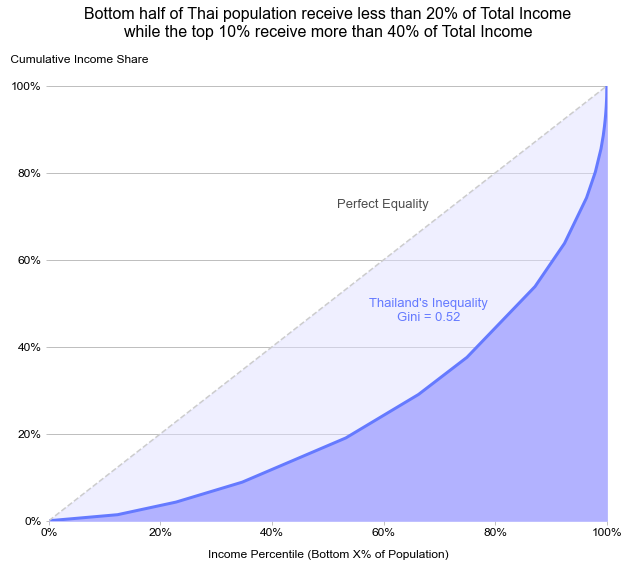

In [598]:
c = '#657aff'
c_light = (224/255,224/255,1.0)
c_dark = '#b2b2ff'

fig, ax = plt.subplots(figsize=(10,8))
ax.plot(lorenz_x, lorenz_y, color=c, linewidth=3)
ax.plot([0,1],[0,1],'0.8',linestyle='--')

ax.set_axisbelow(True)
ax.grid(axis='y')
ax.tick_params(axis='both', color='0.7')


ax.fill_between(lorenz_x, lorenz_y, lorenz_x, where=(lorenz_x >= lorenz_y), color=c_light, alpha=0.5)
ax.fill_between(lorenz_x, lorenz_y, 0, where=(lorenz_y >= 0), color=c_dark)
ax.set_xlabel('Income Percentile (Bottom X% of Population)', labelpad=12)
ax.set_ylabel(' Cumulative Income Share', rotation=0, ha='left', position=(0,1.05))
ax.set_xlim((0,1))
ax.set_ylim((0,1))


ax.xaxis.set_major_formatter(ticker.PercentFormatter(xmax=1))
ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1))

ax.annotate('Perfect Equality', (0.68, 0.72), color='0.3', ha='right', fontsize=13)
ax.annotate("Thailand's Inequality\nGini = %.2f" % gini, (0.68, 0.46), color=c, ha='center', fontsize=13)

plt.title('Bottom half of Thai population receive less than 20% of Total Income\nwhile the top 10% receive more than 40% of Total Income', fontsize=16, y=1.1)
plt.show()

fig.savefig('output/lorenz.jpg', bbox_inches='tight', dpi=300)

#### Where does the skewness begin?

In [688]:
# Last income bracket has no midpoint and has to be excluded.
mid_point = np.array(fin_data['Income_Mid'])[:-1]
avg_inc = np.array(fin_data['AvgIncome'])[:-1]
lb = np.array(fin_data['Income_LB'])[:-1]

# Distance of Mean to Distance of Mid Point from Lower Bound
ratio = (avg_inc - lb) / (mid_point - lb)

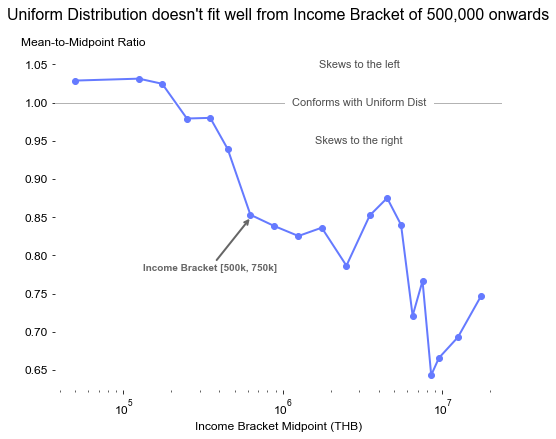

In [689]:
c = '#657aff'

fig, ax = plt.subplots(figsize=(8,6))
ax.axhline(1, color='0.7', linewidth=1)
ax.plot(mid_point, ratio, color=c, linewidth=2, path_effects=[pe.Stroke(linewidth=5, foreground='w'), pe.Normal()])
ax.plot(mid_point, ratio, 'o', color=c)

ax.annotate(" Conforms with Uniform Dist ", (3000000, 1.00), fontsize=11, color='0.3', ha='center', va='center', bbox={'facecolor':'w', 'edgecolor':'w'})
ax.annotate("Skews to the left", (3000000, 1.05), fontsize=11, color='0.3', ha='center', va='center')
ax.annotate("Skews to the right", (3000000, 0.95), fontsize=11, color='0.3', ha='center', va='center')

ax.annotate("Income Bracket [500k, 750k]", xy=(630000, 0.85), xytext=(350000, 0.78), 
            ha='center', color='0.4', weight='bold',
            arrowprops={"arrowstyle":"->", "color":'0.4', "linewidth":2}
           )

ax.set_xscale('log')
ax.set_xlabel('Income Bracket Midpoint (THB)')
ax.set_ylabel('Mean-to-Midpoint Ratio', rotation=0, ha='left', position=(0,1.05))

plt.title("Uniform Distribution doesn't fit well from Income Bracket of 500,000 onwards", fontsize=16, y=1.12)

plt.show()
fig.savefig('output/skewness.jpg', bbox_inches='tight', dpi=300)

The skewness appears to begin at the income bracket [500k, 750k]

#### Fitting Pareto Distribution

In [697]:
pareto_threshold = 500000
high_income_data = fin_data.query('Income_LB >= @pareto_threshold')
low_income_data = fin_data.query('Income_LB < @pareto_threshold')
S = np.array(1.00 - high_income_data['CumN'])[:-1]  # Remove the unbounded bracket (last row) since LOG(0) is undefined.
logS = np.log(S)
logX = np.log(np.array(high_income_data['AvgIncome']))[:-1]

In [698]:
reg = LinearRegression(fit_intercept=True).fit(logX.reshape(-1,1), logS)
alpha = -reg.coef_[0]
print('The estimate of alpha is %.4f' % alpha)

The estimate of alpha is 1.8341


In [699]:
# Prepare the fitted lines data
fit_X = np.linspace(np.min(logX)*0.995, np.max(logX)*1.005, 100)
fit_Y = reg.predict(fit_X.reshape(-1,1))

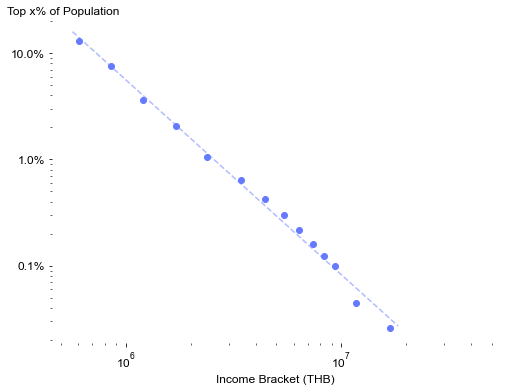

In [700]:
c = '#657aff'

fig, ax = plt.subplots(figsize=(8,6))
ax.plot(high_income_data['AvgIncome'], 1-high_income_data['CumN'], 'o', color=c)
ax.plot(np.exp(fit_X), np.exp(fit_Y), color=c, linestyle='--', alpha=0.5)

ax.set_xscale('log')
ax.set_yscale('log')

ax.set_xlabel('Income Bracket (THB)')
ax.set_ylabel('Top x% of Population', rotation=0, ha='left', position=(0,1))


ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1))

plt.show()

* Sense Check

Expected value of a Pareto distribution with support from $[x_m, \infty)$ is $\frac{\alpha x_m}{\alpha-1}$.

Here $x_m$ is chosen to be 500,000.

The fitted mean is

In [605]:
print('%i' %(alpha / (alpha - 1) * 500000))

1099420


However, the sample mean is

In [606]:
print('%i' % int(np.sum(high_income_data['TotIncome']) / np.sum(high_income_data['N'])))

1132048


If we exclude the last income bracket which is unbounded, the sample mean is

In [607]:
print('%i' % int(np.sum(np.array(high_income_data['TotIncome'])[:-1]) / np.sum(np.array(high_income_data['N'])[:-1])))

1088572


Which is closer to our fitted mean.

## Full Distribution

In [652]:
border_CDF = np.array(high_income_data['CumN_prev'])[0]

In [649]:
def findPercentile(annual):
    # Corner Cases
    if annual <= 0:
        return None
    elif annual >= pareto_threshold:
        # Apply Pareto Distribution
        if annual > 1000000000:
            annual == 1000000000
        return border_CDF + (1 - border_CDF) * (1 - (pareto_threshold / annual) ** alpha)
    else:
        # Linear Interpolation within the corresponding Income Bracket
        return linearInt(annual)
    
def linearInt(annual):
    filter_data = low_income_data.query('Income_LB < @annual & Income_UB >= @annual').to_dict('list')
    lb = filter_data['Income_LB'][0]
    ub = filter_data['Income_UB'][0]
    lb_cdf = filter_data['CumN_prev'][0]
    ub_cdf = filter_data['CumN'][0]
    return lb_cdf + (annual - lb) / (ub - lb) * (ub_cdf - lb_cdf)

In [671]:
income_range = np.logspace(3, 9, 1000)
income_CDF = np.array([findPercentile(income) for income in income_range])

#### Cumulative Distribution Function

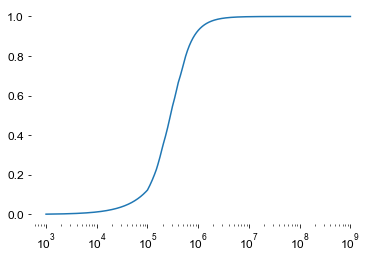

In [706]:
fig, ax = plt.subplots()
ax.plot(income_range, income_CDF)
ax.set_xscale('log')
ax.set_yscale('linear')
plt.show()

## Income Share Calculation

Below the Pareto threshold,

- Add the cumulative share from the previous bracket

- 

#### Bounded Pareto - Estimating the Maximum Income for the unbounded bracket

Pareto distribution has a general property that conditional distribution of value above a threshold $x_n > x_m$ has the expected value of $\frac{\alpha x_n}{\alpha-1}$.

We can check for the fitted mean above 20mil (the unbounded bracket) to be:

In [481]:
print('%i' %(alpha / (alpha - 1) * 20000000))

43976832


The observed mean on this unbounded bracket is:

In [483]:
print('%i' % np.array(high_income_data['AvgIncome'])[-1])


43093652


In [485]:
43093652 / (alpha / (alpha - 1))

19598342.835707944

In [496]:
120000 * 12

1440000

In [513]:
border_CDF + (1 - border_CDF) * (1 - (500000 / 1100000000) ** alpha)

0.9999999047226102

In [520]:
border_CDF + (1 - border_CDF) * (1 - (500000 / 1800000) ** alpha)

0.98772220878183

In [517]:
np.sum(fin_data['N']) * (1- 0.9999998865224974)

1.261065273605374

In [503]:
1 - 1 / np.sum(fin_data['N'])

0.9999999100145687

In [521]:
np.sum(fin_data['N']) * (1 - 0.98772220878183)

136441.98880631317

In [519]:
150000*12

1800000